In [3]:
import numpy as np
import matplotlib.pyplot as plt

In the class notes we have examined the Explicit Forward Euler, Implicit Backward Euler and Crank-Nicholson methods for solving the Heat Equation with homogeneuos Dirichlet boundary conditions. For this Homework solve the following 1-D partial differential equation on the domain specified below with the given boundary conditions using all three methods.

\begin{align*}
\frac{\partial u}{\partial t}+d\frac{\partial u}{\partial x} - c\frac{\partial^2 u}{\partial t^2} &= f\\
u(0,x) &= g(0,x)\\
u(t,0) &= g(t,0)\\
u(t,4) &= g(t,4)
\end{align*}

with

$$g(t,x) = ae^{\frac{-(x-(b+t))^2}{2k^2}}$$

where $a,b,k>0$ are fixed real constants. Note that $a,b,k$ can adjust calues of your functions initial profile. hWhen coding it will help to start by setting 

$$a = 1.0,$$ $$b = .5$$ $$k = .1$$

This gives a Gaussian pulse of height of $1$, centered at $.5$ with a spread set by $k=.1$. Set the forcing funtion $f$ in the governing PDE to be such that the true solution is given by $g(t,x)$. Set the final time $T$ to be something approprate for the task at hand (T = 2). Note the value of $d$ will effect how quickly the pulse moves and which direction it is transported.

Use second order difference approximations for both spatial derivates. For each of the time stepping schemes you should do a convergence study that verifies the order if your method. Use second order finite-differences for both the first and second derivatie approximations. Include your code as a listing or multple listings, and plots of your approximate and true solutions at different times throughout the simulation. 

In [17]:
def f(t,x):  # Forcing Function
    mu     = -(x-(b+t))**2.0/(2*k**2.0)
    dudt   = ((a*(-b-t+x))/(k**2.0))*np.exp(mu)
    dudx   = (-a*(-b-t+x))/(k**2.0)*np.exp(mu)
    d2udx2 = a*((((-b-t+x)**2.0)/(k**4.0))-(1)/(k**2.0))*np.exp(mu)
    return dudt+d*dudx-c*d2udx2

def g(t,x): # true solution
    return a*np.exp((-(x-(b+t))**2.0)/(2.0*(k**2.0)))

In [18]:
def MyStepError(un,uTrue,h):
    stepError = 0
    for i in range(len(un)):
        stepError += (un[i]-uTrue[i])**2.0
    return stepError*h

In [55]:
def CFL(m,TimeSteps):
    B = 4
    A = 0
    T = 2
    t = 0
    h  = (B-A)/(m-1) 
    dt = (T - t)/TimeSteps
    if dt <= .5*h**2.0:
        print("dt = ",dt)
        print("(1.0/2.0)*h**2.0 = ",(1.0/2.0)*h**2.0,"\n")
        return True
    else:
        print("dt = ",dt)
        print("(1.0/2.0)*h**2.0 = ",(1.0/2.0)*h**2.0,"\n")
        return False

In [20]:
def rate_of_conv(eps1,eps2):
    return (np.log(eps1/eps2))/np.log(2)

## Explicit Method

In [21]:
# Model parameters
m = 100          # number of nodes
A = 0            # The Domain LHS
B = 4            # The Domain RHS
TimeSteps = 2451 # The number of time steps
SaveEvery = 400  # Output for plotting and error analysis

t = 0.0         # My initial Time
T = 2.0         # This is the ending time
c = 1.0         # The diffusion coeficient
d = 0.5         # d = .5

a = 1.0        # Parameters in the true solution (Amplitude)
b = 0.5        # Parameters in the true solution
k = 0.1        # Parameters in the true solution

# Method defined paramters
xpts  = np.linspace(A,B,100)
un    = g(0.0,xpts)  #True solution           
dt    = (T - t)/TimeSteps
h     = (B-A)/(m-1) 
gamma = dt/h

#plt.plot(xpts,un)
#plt.plot(xpts,f(t,xpts))

### Here we need to check to see if the CFL condition is satisfied

In [22]:
CFL(dt,h) # If false, decrease dt by increasing time steps, or increase h by lowering nodes

dt =  0.0008159934720522236
(1.0/2.0)*h**2.0 =  0.0008162432404856648 



True

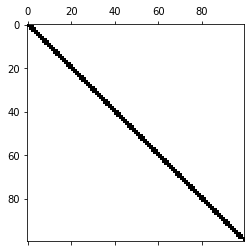

[3.37194481436896e-05, 0.0029188734650902773, 0.00415602254668185, 0.0051017031902783234, 0.005897688868123925, 0.006598354198465523, 0.007231449951986694]


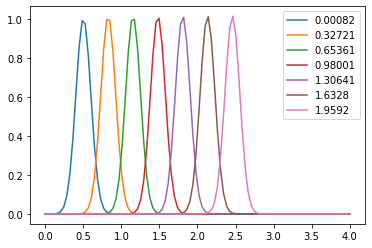

In [23]:
# Set up a system matrix
AF = np.zeros(m*m).reshape(m,m)

# Implement boundary rows for the matrix
AF[0,0  ] = 1.0
AF[-1,-1] = 1.0

# Also for the RHS.
for i in range(1,m-1):
  # Looking at Everything but the edges
    AF[i,i-1] = ((d/2.0)*gamma)+(c/h)*gamma
    AF[i,i  ] = (-2.0*c/h)*gamma+1
    AF[i,i+1] = ((-d/2.0)*gamma)+(c/h)*gamma
    
plt.spy(AF)
plt.show()
un = un.T
Error  = []
ErrorTime = []

error = 0

for i in range(TimeSteps):
    RHS = f(t,xpts)
    un = AF@un + dt*RHS.T
    t = t+dt
    un[0]  = g(t,0)   # Sets the B.C on the LHS
    un[-1] = g(t,4)   # Sets the B.C on the RHS
    #output the solution using the Save Every flag.
    uTrue  = g(t,xpts)
    error = error + (MyStepError(un,uTrue.T,h))*dt
    if((i%SaveEvery)==0):
        Error.append(error**0.5)
        ErrorTime.append(t)
        plt.plot(xpts,un, label = round(t,5))
        plt.legend(loc="upper right")
    
print(Error)

### If convergence rate is 2, then we did our explict method correctly. 

In [24]:
def Explicit(m, TimeSteps):
    # Model parameters
    A = 0           # The Domain LHS
    B = 4           # The Domain RHS
    SaveEvery = 100  # Output for plotting and error analysis
        
    t = 0.0         # My initial Time
    T = 2.0         # This is the ending time
    c = 1.0         # The diffusion coeficient
    d = 0.5         # d = .5

    a = 1.0        # Parameters in the true solution (Amplitude)
    b = 0.5        # Parameters in the true solution
    k = 0.1        # Parameters in the true solution

    # Method defined paramters
    xpts  = np.linspace(A,B,m)
    un    = g(0.0,xpts)  #True solution           
    dt    = (T - t)/TimeSteps
    h     = (B-A)/(m-1) 
    gamma = dt/h

    if CFL(dt,h) == True:
        pass
    else: 
        print("\n",m,"is not a valid choice for number of nodes\n")
        print(TimeSteps,"is not a valid choice for number of TimeSteps")
        return print("\nChoose a new 'm' or # of TimeSteps")
    
    # Set up a system matrix
    AF = np.zeros(m*m).reshape(m,m)

    # Implement boundary rows for the matrix
    AF[0,0  ] = 1.0
    AF[-1,-1] = 1.0

    # Also for the RHS.
    for i in range(1,m-1):
      # Looking at Everything but the edges
        AF[i,i-1] = ((d/2.0)*gamma)+(c/h)*gamma
        AF[i,i  ] = (-2.0*c/h)*gamma+1
        AF[i,i+1] = ((-d/2.0)*gamma)+(c/h)*gamma
    
    #plt.spy(AF)
    #plt.show()
    un = un.T
    Error  = []
    ErrorTime = []

    error = 0

    for i in range(TimeSteps):
        RHS = f(t,xpts)
        un = AF@un + dt*RHS.T
        t = t+dt
        un[0]  = g(t,0)   # Sets the B.C on the LHS
        un[-1] = g(t,4)   # Sets the B.C on the RHS
        #output the solution using the Save Every flag.
        uTrue  = g(t,xpts)
        error = error + (MyStepError(un,uTrue.T,h))*dt
        if((i%SaveEvery)==0):
            Error.append(error**0.5)
            ErrorTime.append(t)
            #plt.plot(xpts,un, label = round(t,5))
            #plt.legend(loc="upper right")
    
    return Error

In [25]:
eps100 = Explicit(100,int(9990/2))
eps200 = Explicit(200,9990)

dt =  0.0004004004004004004
(1.0/2.0)*h**2.0 =  0.0008162432404856648 

dt =  0.0002002002002002002
(1.0/2.0)*h**2.0 =  0.000202015100628772 



In [26]:
for i in range(50):
    alpha = rate_of_conv(eps100[i],eps200[i])
    print(alpha)

3.4820975802869327
2.6963770276026846
2.6163418842869204
2.5861283165185305
2.5706646616905346
2.561333836385986
2.555084956994448
2.550596534475715
2.547209453312219
2.5445588203784455
2.542426004759273
2.5406717461076203
2.5392029508716627
2.537954919728386
2.536881230197329
2.5359476761390596
2.535128479365418
2.5344038346025552
2.5337582687024565
2.5331795144391607
2.5326577193348787
2.5321848783723935
2.53175441980088
2.5313608977881383
2.5309997610184327
2.530667176167462
2.5303598916255194
2.530075131141929
2.5298105099901678
2.5295639682765927
2.529333717436185
2.5291181969698435
2.528916039206778
2.528726040407404
2.528547136914499
2.528378385352792
2.528218946097109
2.528068069396293
2.5279250836678395
2.52778938557693
2.527660431590053
2.5275377307534788
2.527420838493994
2.5273093512767626
2.527202901984984
2.527101155909929
2.527003807259153
2.526910576106357
2.526821205718942
2.526735460209759


## Implicit Method

In [382]:
# Model parameters
m = 70         # number of nodes
A = 0           # The Domain LHS
B = 4           # The Domain RHS
TimeSteps = 35 # The number of time steps
SaveEvery = 5  # Output for plotting and error analysis

t = 0.0         # My initial Time
T = 2.0         # This is the ending time
c = 1.0         # The diffusion coeficient
d = 0.5         # d = .5

a = 1.0        # Parameters in the true solution (Amplitude)
b = 0.5        # Parameters in the true solution
k = 0.1        # Parameters in the true solution

# Method defined paramters
xpts  = np.linspace(A,B,m)
un    = g(0.0,xpts)  #True solution           
dt    = (T - t)/TimeSteps
h     = (B-A)/(m-1) 
gamma = dt/h

$$h-\epsilon \leq dt \leq h+ \epsilon $$
$$0 \leq dt -h + \epsilon\leq 2\epsilon $$

In [383]:
def about(dt,h):
    if dt > h:
        val1 = h
        val2 = dt
    else: 
        val1 = dt
        val2 = h
    
    if np.abs(dt-h) <= val1/val2:
        print("dt = ",dt)
        print("h = ",h)
        return True
    else:
        print("dt = ",dt)
        print("h = ",h)
        return False

about(dt,h) # If false then they are not within a certain eps. 
              # We want them to be about the same value
              # To make them be about the same value change number of nodes (affects h)
              # or change the amount of time steps (affects dt)

dt =  0.05714285714285714
h =  0.057971014492753624


True

In [384]:
10/.435432

22.96569843282074

[0.0015676446117131645, 0.004776713289188032, 0.006897011105944414, 0.008582186737150317, 0.010015986259356775, 0.011281162910738848, 0.012424462312890355]


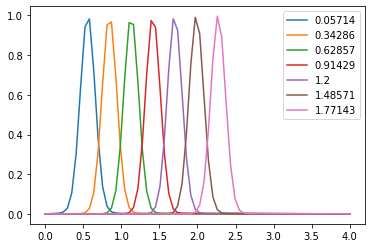

In [385]:
AB=np.zeros([m,m])

for i in range(1,m-1):
    # Looking at Everything but the edges
    AB[i,i-1] = (-d/(2.0))*gamma-(c/h)*gamma
    AB[i,i  ] = ((2.0*c/h)*gamma)+1.0
    AB[i,i+1] = (d/2.0)*gamma-(c/h)*gamma
    
AB[0,0  ] = 1
AB[-1,-1] = 1

un = un.T
Error  = []
ErrorTime = []

error = 0
   
RHS[0]  = g(t,A)
RHS[-1] = g(t,B)
    
for i in range(TimeSteps):
    t = t + dt
    RHS = dt*f(t,xpts)+un
    
    un = np.linalg.solve(AB,RHS)
    
    uTrue = g(t,xpts)
    
    #output the solution using the Save Every flag.
    
    uTrue  = g(t,xpts)
    error = error + (MyStepError(un,uTrue.T,h))*dt
    if((i%SaveEvery)==0):
        Error.append(error**0.5)
        ErrorTime.append(t)
        plt.plot(xpts,un, label = round(t,5))
        plt.legend(loc="upper right")
        
print(Error)    
#print(errtime)    

In [645]:
def Implicit(m,TimeSteps):
    # Model parameters
    A = 0           # The Domain LHS
    B = 4           # The Domain RHS
    SaveEvery = 5  # Output for plotting and error analysis

    t = 0.0         # My initial Time
    T = 2.0         # This is the ending time
    c = 1.0         # The diffusion coeficient
    d = 0.5         # d = .5

    a = 1.0        # Parameters in the true solution (Amplitude)
    b = 0.5        # Parameters in the true solution
    k = 0.1        # Parameters in the true solution

    # Method defined paramters
    xpts  = np.linspace(A,B,m)
    un    = g(0.0,xpts)  #True solution           
    dt    = (T - t)/TimeSteps
    h     = (B-A)/(m-1) 
    gamma = dt/h

    AB=np.zeros([m,m])

    for i in range(1,m-1):
        # Looking at Everything but the edges
        AB[i,i-1] = (-d/(2.0))*gamma-(c/h)*gamma
        AB[i,i  ] = ((2.0*c/h)*gamma)+1.0
        AB[i,i+1] = (d/2.0)*gamma-(c/h)*gamma
    
    AB[0,0  ] = 1
    AB[-1,-1] = 1

    un = un.T
    Error  = []
    ErrorTime = []

    error = 0
    
    for i in range(TimeSteps):
        t = t + dt
        RHS = dt*f(t,xpts)+un
           
        RHS[0]  = g(t,A)
        RHS[-1] = g(t,B)
    
        un = np.linalg.solve(AB,RHS)
    
        uTrue = g(t,xpts)
    
        #output the solution using the Save Every flag.
    
        uTrue  = g(t,xpts)
        error = error + (MyStepError(un,uTrue.T,h))*dt
        if((i%SaveEvery)==0):
            Error.append(error**0.5)
            ErrorTime.append(t)
            #plt.plot(xpts,un, label = round(t,5))
            #plt.legend(loc="upper right")
        
    return Error    

In [674]:
eps100 = Implicit(100,200)
eps200 = Implicit(200,400)

In [679]:
for i in range(40):
    alpha = rate_of_conv(eps100[i],eps200[i])
    print(alpha)

3.0885998868752313
2.90060623095627
2.851169107945765
2.820452077032958
2.796464857506992
2.7764758430544196
2.759381836030568
2.7445498495694243
2.7315466241429682
2.720050365883355
2.7098122696464055
2.7006355114033065
2.692361972844844
2.6848631142211685
2.6780333939341827
2.6717853881209597
2.6660461028143914
2.66075414847794
2.6558575507058553
2.6513120370464995
2.6470796842763358
2.6431278412358337
2.639428264190457
2.6359564174487264
2.6326909034919614
2.629612995376201
2.626706250499643
2.6239561895790318
2.6213500282653674
2.618876451554554
2.616525423231656
2.6142880241886854
2.6121563146939324
2.610123216653995
2.6081824126632522
2.6063282592290045
2.6045557120309457
2.602860261448816
2.6012378768935096
2.5996849587205006


## Crank-Nicholson (Theta Method)

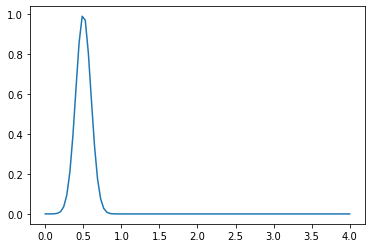

In [56]:
# Model parameters
m = 100          # number of nodes
A = 0           # The Domain LHS
B = 4           # The Domain RHS
TimeSteps = 2500 # The number of time steps
SaveEvery = 250  # Output for plotting and error analysis

t = 0.0         # My initial Time
T = 2.0         # This is the ending time
c = 1.0         # The diffusion coeficient
d = 0.5         # d = .5

a = 1.0        # Parameters in the true solution (Amplitude)
b = 0.5        # Parameters in the true solution
k = 0.1        # Parameters in the true solution

theta = .5     # theta = 0 -> turn off Imp // theta = 1 -> turn off Exp

# Method defined paramters
xpts  = np.linspace(A,B,m)
xtrue  = np.linspace(A,B,1000) 
un    = g(0.0,xpts)  #True solution           
dt    = (T - t)/TimeSteps
h     = (B-A)/(m-1) 
gamma = dt/h

plt.plot(xpts,un)

In [57]:
CFL(m,TimeSteps)  #If false, decrease dt by increasing time steps, or increase h by lowering nodes

dt =  0.0008
(1.0/2.0)*h**2.0 =  0.0008162432404856648 



True

In [66]:
def Crank(m,TimeSteps):
    # Model parameters
    A = 0           # The Domain LHS
    B = 4           # The Domain RHS
    SaveEvery = 100  # Output for plotting and error analysis

    t = 0.0         # My initial Time
    T = 2.0         # This is the ending time
    c = 1.0         # The diffusion coeficient
    d = 0.5         # d = .5

    a = 1.0        # Parameters in the true solution (Amplitude)
    b = 0.5        # Parameters in the true solution
    k = 0.1        # Parameters in the true solution

    theta = .5     # theta = 0 -> turn off Imp // theta = 1 -> turn off Exp

    # Method defined paramters
    xpts  = np.linspace(A,B,m)
    xtrue  = np.linspace(A,B,1000) 
    un    = g(0.0,xpts)  #True solution           
    dt    = (T - t)/TimeSteps
    h     = (B-A)/(m-1) 
    gamma = dt/h
    
    un = un.T
    error = 0
    Error  = []
    ErrorTime = []

#plt.plot(xpts,un)
# Set up a system matrix
    AF = np.zeros(m*m).reshape(m,m)
    AB = np.zeros(m*m).reshape(m,m)

# Implement boundary rows for the matrix
    AF[0,0  ] = 1.0
    AF[-1,-1] = 1.0
    AB[0,0  ] = 1.0
    AB[-1,-1] = 1.0

    for i in range(1,m-1):
    
        # Looking at Everything but the edges
        AF[i,i-1] = ((d/2.0)*gamma)+(c/h)*gamma
        AF[i,i  ] = (-2.0*c/h)*gamma+1
        AF[i,i+1] = ((-d/2.0)*gamma)+(c/h)*gamma
    
    # Looking at Everything but the edges
        AB[i,i-1] = (-d/(2.0))*gamma-(c/h)*gamma
        AB[i,i  ] = ((2.0*c/h)*gamma)+1.0
        AB[i,i+1] = (d/2.0)*gamma-(c/h)*gamma
    
    for i in range(TimeSteps):
        t = t + dt
        #RHS = dt*f(t,xpts)+un
    
       # Implicit Method
        
        RHS1 = dt*f(t,xpts)+un
    
        un = np.linalg.solve(AB,RHS1)
    
    #uTrue = g(t,xpts)
    
    
       # Explicit Method
    
        RHS2 = f(t,xpts)
        un = AF@un + dt*RHS2.T
    
        un = (np.linalg.solve(AB,RHS1)*theta
             +(AF@un + dt*RHS2.T)*(1-theta))
        uTrue = g(t,xpts)
    
    #output the solution using the Save Every flag.
    
        uTrue  = g(t,xpts)
        error = error + (MyStepError(un,uTrue.T,h))*dt
        if((i%SaveEvery)==0):
            Error.append(error**0.5)
            ErrorTime.append(t)
            plt.plot(xpts,uTrue, "k")
            plt.plot(xpts,un, label = round(t,5))
            plt.legend(loc="upper right")
        
    return Error
#print(Error)    
#print(errtime)    

In [67]:
CFL(100,2500) 

dt =  0.0008
(1.0/2.0)*h**2.0 =  0.0008162432404856648 



True

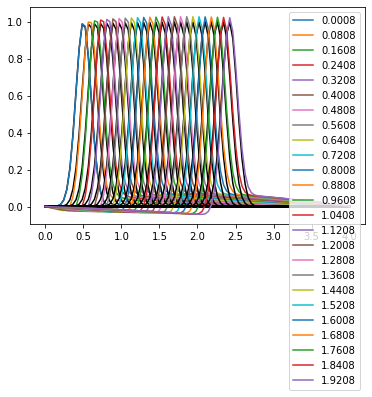

In [68]:
eps100 = Crank(100,2500)

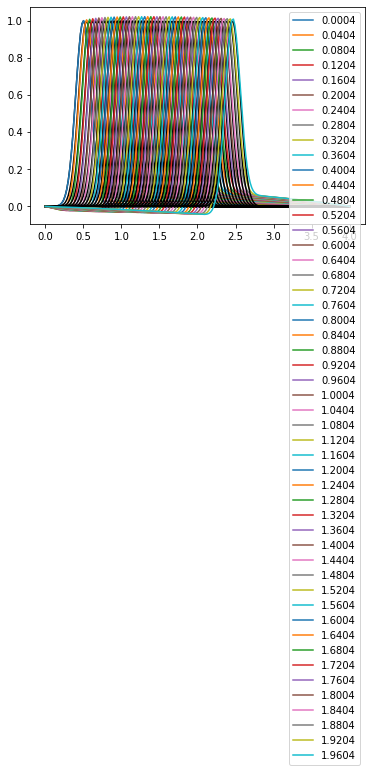

In [69]:
eps200 = Crank(200,5000)

In [75]:
for i in range(25):
    alpha = rate_of_conv(eps100[i],eps200[i])
    print(alpha)

1.711418812774403
0.8922428956101878
0.8494066984231752
0.8517482275229883
0.8577770891379473
0.8617241447951566
0.8632741457913877
0.862823786205314
0.860680672776536
0.8569977842517817
0.8518329605602799
0.8452071237568508
0.8371408665466228
0.8276725642699447
0.8168646327525129
0.8048033249721861
0.79159560717855
0.777365174805235
0.762248679365137
0.7463926373046238
0.7299511537618892
0.7130844181352496
0.6959578461178919
0.6787417115239549
0.6616111053705737
